Problem 1 - Perform a classification task with knn from scratch

1. Load the dataset and perform EDA

In [1]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("/content/drive/MyDrive/Week 4 dataset/diabetes_.csv")
print(dataframe.shape)
print(dataframe.head())
print(dataframe.columns)
print(dataframe.dtypes)
print(dataframe.describe())
print(dataframe.isnull().sum())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness            

2.Handling missing data

In [2]:
missing_info = dataframe.isnull().sum() / len(dataframe) * 100
for col in dataframe.columns:
  if missing_info[col]>10:
    dataframe[col].fillna(dataframe[col].median())
  else:
    dataframe.dropna(subset=[col],inplace=True)
print("Data after processing:n", dataframe.head())

Data after processing:n    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


3.Feature Engineering

Seperating data into test-train split

In [3]:

X = dataframe.drop(columns=["Outcome"]).values
y= dataframe["Outcome"].values
def train_test_split(X, y, test_size=0.3, random_seed=42):
 np.random.seed(random_seed)
 indices = np.arange(X.shape[0])
 np.random.shuffle(indices)
 test_split_size = int(len(X) * test_size)
 test_indices = indices[:test_split_size]
 train_indices = indices[test_split_size:]
 X_train, X_test = X[train_indices], X[test_indices]
 y_train, y_test = y[train_indices], y[test_indices]
 return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


Implementing KNN

In [4]:
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have same dimensions to calculate Euclidean distance")
  distance = np.sqrt(np.sum(point1 - point2) ** 2)
  return distance

 Function to predict class for single query

In [5]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)[:k]
  nearest_indices=sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

Function to predict classes for all test samples

In [6]:
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

Evaluate using accuracy

In [7]:
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [8]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
print("Predictions:", predictions)
unscaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


Problem-2 Experimentation

In [9]:
def min_max_scaling(X):
  min_values = np.min(X, axis=0)#minimum of each column
  max_values = np.max(X, axis=0)#maximum of each column
  X_scaled = (X - min_values) / (max_values - min_values)
  return X_scaled
X_scaled = min_max_scaling(X)
Xscaled_train, Xscaled_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)


In [10]:
scaled_predictions = knn_predict(Xscaled_test, Xscaled_train, y_train, k=3)
print("Predictions:", predictions)
scaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Accuracy: 61.73913043478261


Problem 3- Experiment with different values of k

In [11]:
#fuctionn to check k values on different values of k and plot the accuracy for unscaled
import matplotlib.pyplot as plt
import time
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  accuracies = {}
  times={}
  for k in k_values:
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    accuracy = compute_accuracy(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    accuracies[k] = accuracy
    times[k]=execution_time
    print(f"Accuracy for k={k} is {accuracy:.2f}%")
    #print(f"Time for k = {k} is {execution_time:.3f}seconds")
  return accuracies, times
k_values = range(1,16)
print("For unscaled data")
accuracy_unscaled, time_unscaled= experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
print("For scaled data")
accuracy_scaled, time_scaled= experiment_knn_k_values(Xscaled_train, y_train, Xscaled_test, y_test, k_values)


For unscaled data
Accuracy for k=1 is 60.00%
Accuracy for k=2 is 63.91%
Accuracy for k=3 is 61.74%
Accuracy for k=4 is 66.96%
Accuracy for k=5 is 64.35%
Accuracy for k=6 is 64.35%
Accuracy for k=7 is 65.65%
Accuracy for k=8 is 66.52%
Accuracy for k=9 is 67.39%
Accuracy for k=10 is 67.83%
Accuracy for k=11 is 66.96%
Accuracy for k=12 is 66.52%
Accuracy for k=13 is 68.26%
Accuracy for k=14 is 66.09%
Accuracy for k=15 is 66.96%
For scaled data
Accuracy for k=1 is 61.74%
Accuracy for k=2 is 66.96%
Accuracy for k=3 is 66.96%
Accuracy for k=4 is 68.26%
Accuracy for k=5 is 70.87%
Accuracy for k=6 is 71.30%
Accuracy for k=7 is 70.00%
Accuracy for k=8 is 71.74%
Accuracy for k=9 is 72.17%
Accuracy for k=10 is 72.17%
Accuracy for k=11 is 71.30%
Accuracy for k=12 is 71.74%
Accuracy for k=13 is 71.74%
Accuracy for k=14 is 72.61%
Accuracy for k=15 is 73.04%


Visualizing the results

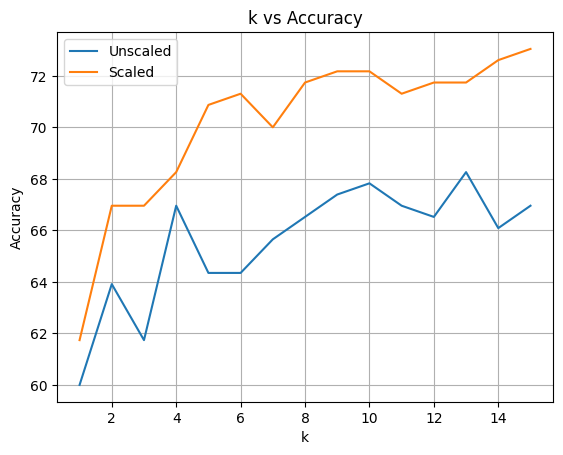

In [12]:
#Plot for accuracy
plt.figure()
plt.plot(k_values, accuracy_unscaled.values(), label="Unscaled")
plt.plot(k_values, accuracy_scaled.values(),  label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()

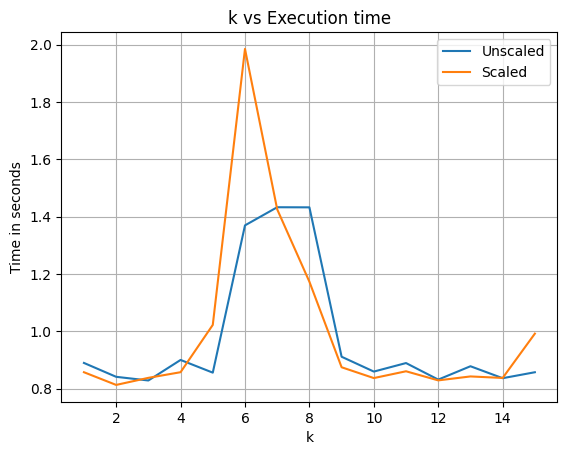

In [13]:
#plot for time
plt.figure()
plt.plot(k_values, time_unscaled.values(), label="Unscaled")
plt.plot(k_values, time_scaled.values(),  label="Scaled")
plt.xlabel("k")
plt.ylabel("Time in seconds")
plt.title("k vs Execution time")
plt.legend()
plt.grid()
plt.show()

3.
Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

There are two conditions how k affects accuracy and computational costs-

When k is small, the model mostly only focuses on the nearest data points which results in higher accuracy but the downside is that it is sensitive to noise and can make wrong predictions which leads to high variance and low bias additionally increasing the risk of overfitting.This is faster and cheaper as only few data's are considered.

Accordingly when the value of k is bigger, the model has to focus on many data points which results in lower accuracy,high bias and low variance as it ignores local patterns also known as underfitting.This is slower and more expensive as we have to consider many data's.



Based on my analysis, the best value of k is a moderate one that maintains a good balance between accuracy and efficiency. The value of k is chosen by testing different options and selecting the one that gives the highest accuracy. In conclusion, k = 10 delivers the best overall performance.

Problem - 4 - Additional Questions {Optional - But Highly Recommended}: • Discuss the challenges of using KNN for large datasets and high-dimensional data. • Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality reduction).

KNN can face problems when working with large datasets. Every time it needs to classify a new data point, it has to compare it with all existing training points, which takes a lot of time, memory, and computing power as the data size increases.

It also struggles with high-dimensional data. When there are too many features, the distance between points becomes less reliable, making it harder to find the true nearest data and reducing the model’s accuracy.

Strategies that can be implemented to improve efficiency of KNN is -

One effective way to overcome these issues is dimensionality reduction, which removes unnecessary features while keeping the most important information. This makes the model faster and more accurate. Additionally, using efficient data structures like KD-trees or Ball trees helps speed up the process of finding nearest neighbors, improving overall performance.